In [1]:
from plothist.plotters import make_hist
from plothist.plotters import make_2d_hist
from plothist.plotters import cubehelix_palette
from plothist.hep_plotters import compare_data_mc
from plothist.hep_plotters import plot_b2_logo
from plothist.generate_dummy_data import generate_dummy_data

In [2]:
# Generate dummy data
df = generate_dummy_data()
df.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,category
0,3.161042,0.626421,-0.315482,-2.264888,-5.781431,-3.406428,1.759432,1.146277,3.047033,1.442019,2
1,-0.181271,-3.567424,2.257261,-0.449406,-4.044520,-0.892859,1.510282,1.462701,-2.730473,3.381304,4
2,-2.291207,-2.257079,-2.195531,-1.726600,-3.583056,-3.436460,-2.698386,1.111759,1.378220,-0.169138,6
3,2.080979,-1.865050,2.895760,-3.415163,-4.098792,3.783088,0.757920,-3.674254,2.831025,0.668761,2
4,-2.468859,-3.788331,2.821014,0.965556,-3.902289,-2.797187,2.484887,0.164317,-1.315192,1.629387,4


# 1. Compare data and MC for a 1D variable

## 1.1 Define the histograms

In [3]:
key = "variable_1"
x_range = [-10, 10]
category = "category"

# Define masks

signal_mask = df[category] == 7
data_mask = df[category] == 8

background_categories = [0, 1, 2]  # [0, 1, 2, 3, 4, 5, 6]
background_categories_labels = [f"c{i}" for i in background_categories]
background_categories_colors = cubehelix_palette(
    ncolors=len(background_categories),
    start=1.5,
    rotation=1.5,
    darkest=0.3,
    lightest=0.8,
    reverse=True,
)
background_masks = [df[category] == p for p in background_categories]

# Make histograms

data_hist = make_hist(df[key][data_mask], bins=50, range=x_range, weights=1)
background_hists = [
    make_hist(df[key][mask], bins=50, range=x_range, weights=1)
    for mask in background_masks
]
signal_hist = make_hist(df[key][signal_mask], bins=50, range=x_range, weights=1)

# Optional: scale to data

background_scaling_factor = data_hist.sum().value / sum(background_hists).sum().value
background_hists = [background_scaling_factor * h for h in background_hists]

signal_scaling_factor = data_hist.sum().value / signal_hist.sum().value
signal_hist *= signal_scaling_factor

## 1.2 Compare data and stacked histogram

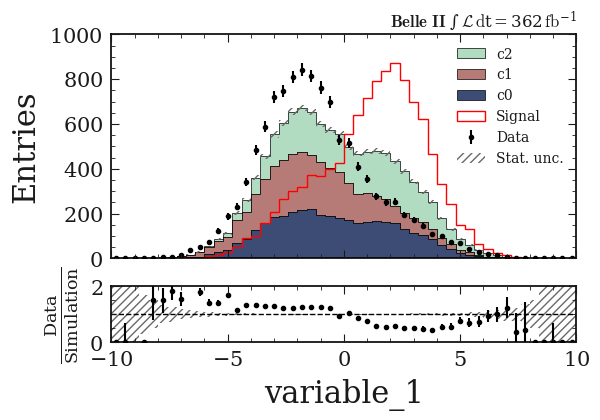

In [4]:
fig, ax_comparison, ax_ratio = compare_data_mc(
    data_hist=data_hist,
    mc_hist_list=background_hists,
    signal_hist=signal_hist,
    xlabel=key,
    ylabel="Entries",
    mc_labels=background_categories_labels,
    mc_colors=background_categories_colors,
    save_as=None,
    stacked=True,
)
plot_b2_logo(ax=ax_comparison)

## 1.3 Compare data and un-stacked histogram

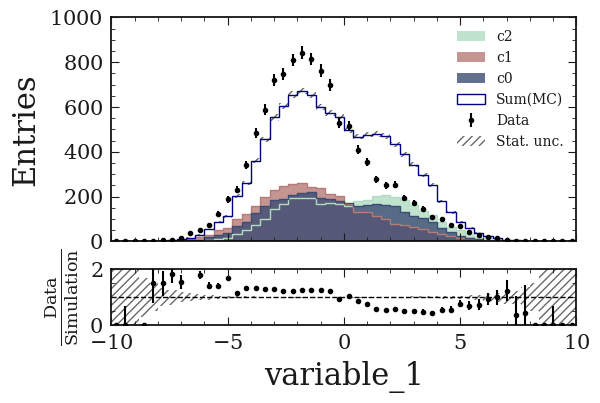

In [5]:
fig, ax_comparison, ax_ratio = compare_data_mc(
    data_hist=data_hist,
    mc_hist_list=background_hists,
    signal_hist=None,
    xlabel=key,
    ylabel="Entries",
    mc_labels=background_categories_labels,
    mc_colors=background_categories_colors,
    save_as=None,
    stacked=False,
)

# 2 Compare data and stacked histogram for a flatten 2D variable

## 2.1 Define the histograms

In [7]:
key1 = "variable_1"
key2 = "variable_2"
binning1 = [-10, 0, 10]
binning2 = [-10, -5, 0, 5, 10]
binning = [binning1, binning2]
category = "category"

# Define datasets

signal_mask = df[category] == 7
data_mask = df[category] == 8

background_categories = [0, 1, 2, 3, 4, 5, 6]
background_categories_labels = [f"c{i}" for i in background_categories]
background_categories_colors = cubehelix_palette(
    ncolors=len(background_categories),
    start=1.5,
    rotation=1.5,
    darkest=0.3,
    lightest=0.8,
    reverse=True,
)
background_masks = [df[category] == p for p in background_categories]

# Make histograms

data_hist = make_2d_hist(
    [df[key][data_mask] for key in [key1, key2]], binning=binning, weights=1
)
background_hists = [
    make_2d_hist([df[key][mask] for key in [key1, key2]], binning=binning, weights=1)
    for mask in background_masks
]
signal_hist = make_2d_hist(
    [df[key][signal_mask] for key in [key1, key2]], binning=binning, weights=1
)

## 2.2 Compare data and stacked histogram

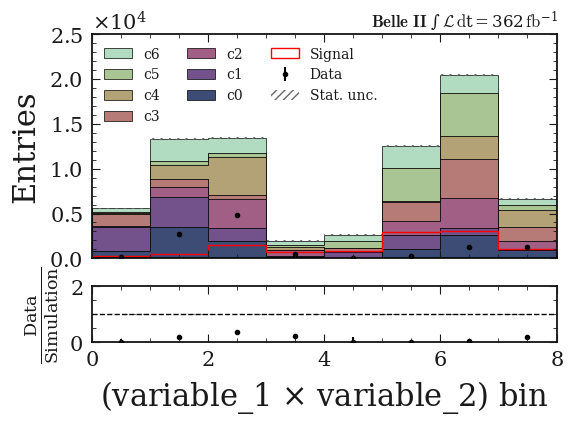

In [8]:
fig, ax_comparison, ax_ratio = compare_data_mc(
    data_hist=data_hist,
    mc_hist_list=background_hists,
    signal_hist=signal_hist,
    xlabel=fr"({key1} $\times$ {key2}) bin",
    ylabel="Entries",
    mc_labels=background_categories_labels,
    mc_colors=background_categories_colors,
    save_as=None,
    flatten_2d_hist=True,
)  # /!\ Important argument

plot_b2_logo(ax=ax_comparison)
ax_comparison.legend(ncol=3, fontsize=10)